In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
%matplotlib inline
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-2-76b734dff1de>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [14]:
#Loading data
df = pd.read_csv('churn.csv')
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [10]:
df.tail

<bound method NDFrame.tail of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [15]:
df.shape

(10000, 14)

In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
table = df.describe
table

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [28]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

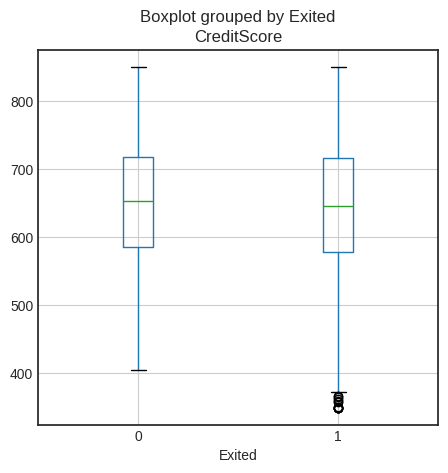

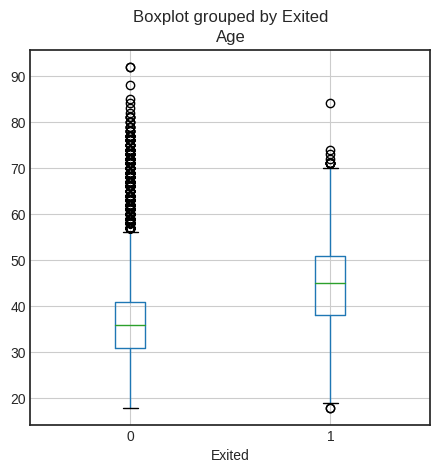

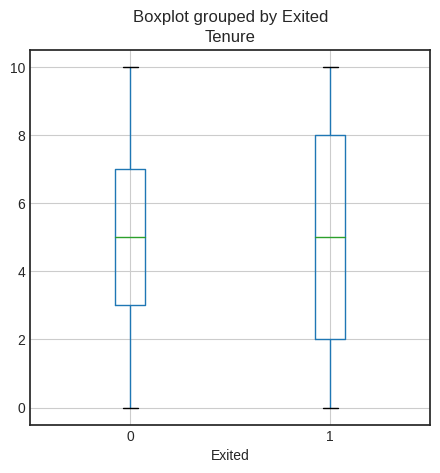

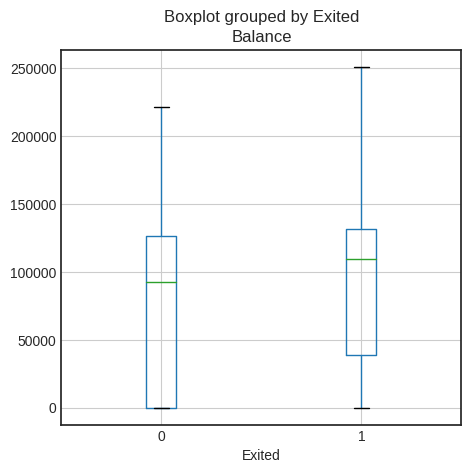

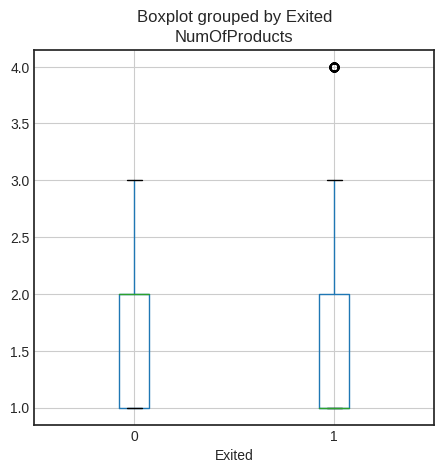

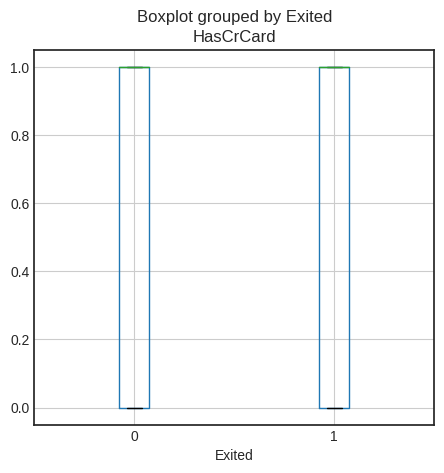

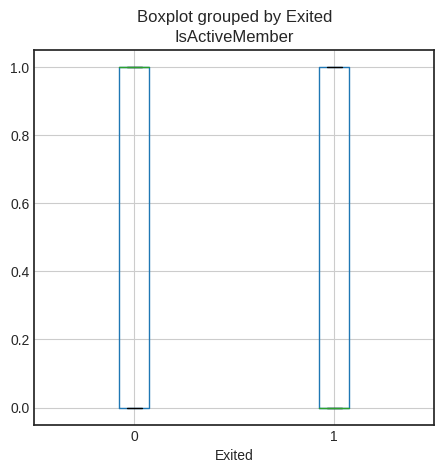

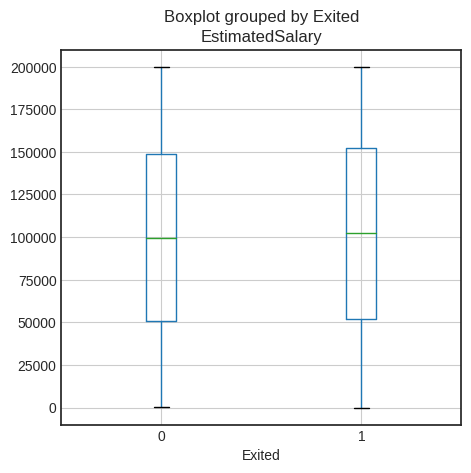

In [29]:
for i in df.columns.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender','Exited']):
    boxplot = df.boxplot(column=i, by = 'Exited',figsize=(5,5))

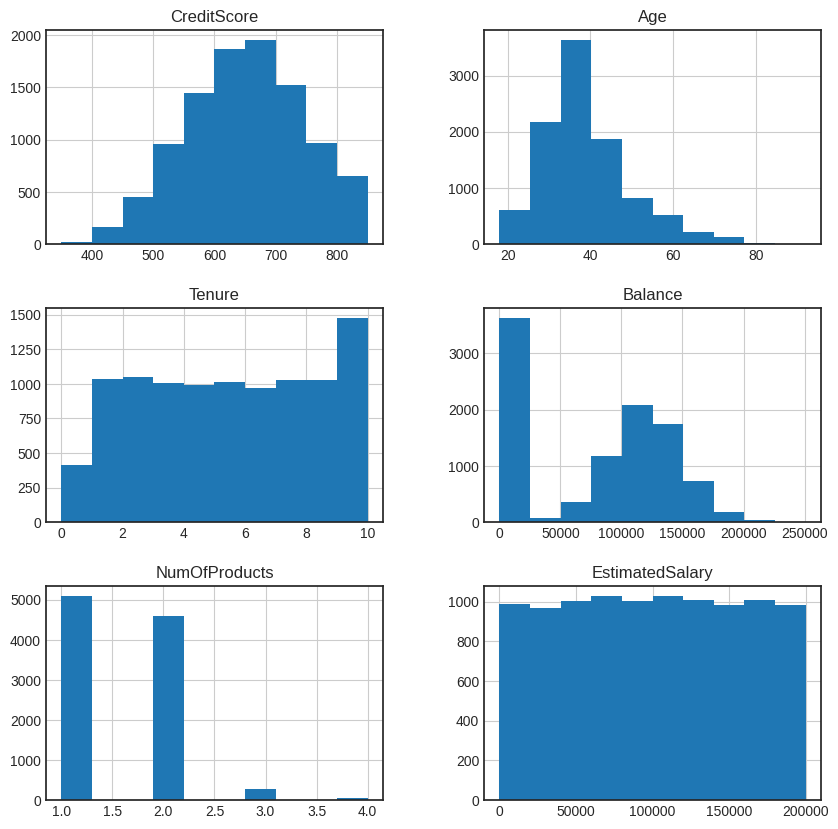

In [30]:
df.hist(column=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'], figsize=(10,10))
plt.show()

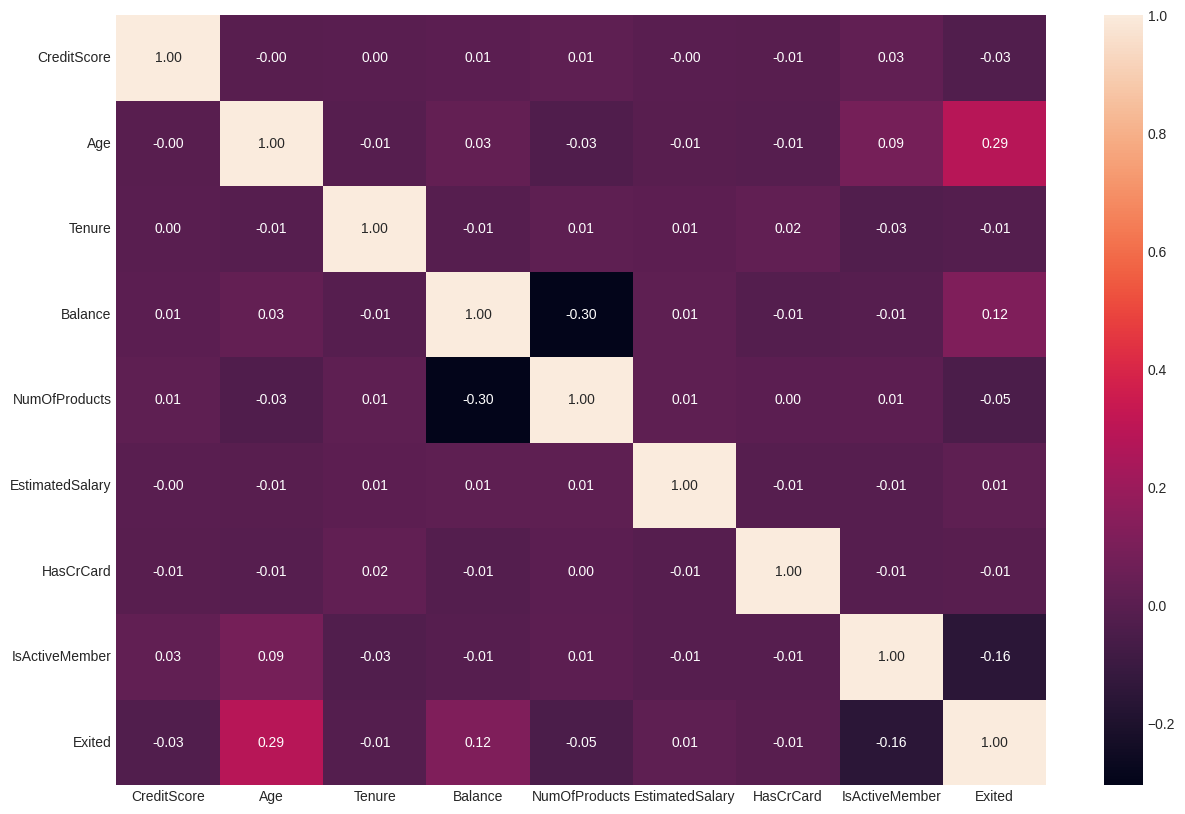

In [31]:
list1 = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Exited']
plt.figure(figsize=(15,10))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.show()

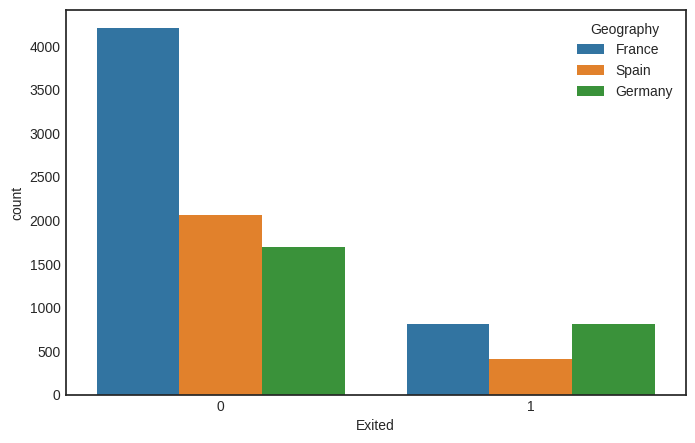

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Geography', data=df)
plt.show()


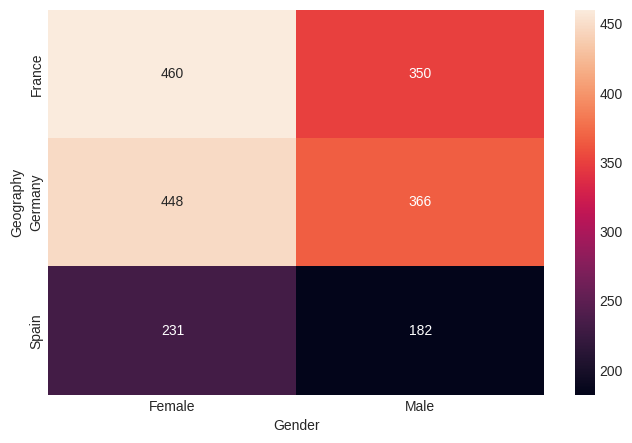

In [33]:
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(df['Geography'], df['Gender'], values=df['Exited'], aggfunc=np.sum)
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

In [34]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [35]:
for i in range(len(df)):
    if df['EstimatedSalary'][i]<= 50000:
        df['EstimatedSalary'][i]= 'Poor'
    elif 50000 < df['EstimatedSalary'][i]<= 100000:
        df['EstimatedSalary'][i]= 'Good'
    elif 100000 < df['EstimatedSalary'][i]<= 200000:
        df['EstimatedSalary'][i]= 'Excellent'
    else:
        df['EstimatedSalary'][i]= "Top"

<ipython-input-35-f91b2aab9968>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimatedSalary'][i]= 'Excellent'


In [36]:
for i in range(len(df)):
    if df['Balance'][i]<= 25000:
        df['Balance'][i]= 'Poor'
    elif 25000 < df['Balance'][i]<= 100000:
        df['Balance'][i]= 'Good'
    elif 100000 < df['Balance'][i]<= 200000:
        df['Balance'][i]= 'Excellent'
    else:
        df['Balance'][i]= "Top"

<ipython-input-36-71ee8dca9bc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balance'][i]= 'Poor'


In [37]:
df['Gender'],df['Geography'],df['Balance'],df['EstimatedSalary']=df['Gender'].astype('category'),df['Geography'].astype('category'),df['Balance'].astype('category'),df['EstimatedSalary'].astype('category')
df['Gender']=df.Gender.cat.codes
df['Geography']=df.Geography.cat.codes
df['Balance']=df.Balance.cat.codes
df['EstimatedSalary']=df.EstimatedSalary.cat.codes

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  int8   
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  int8   
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), int8(4)
memory usage: 586.1 KB


In [43]:
df.head

<bound method NDFrame.head of       CreditScore  Geography  Gender       Age  Tenure  Balance  \
0       -0.326221          0       0  0.293517       2        2   
1       -0.440036          2       0  0.198164       1        1   
2       -1.536794          0       0  0.293517       8        0   
3        0.501521          0       0  0.007457       1        2   
4        2.063884          2       0  0.388871       2        0   
...           ...        ...     ...       ...     ...      ...   
9995     1.246488          0       1  0.007457       5        2   
9996    -1.391939          0       1 -0.373958      10        1   
9997     0.604988          0       0 -0.278604       7        2   
9998     1.256835          1       1  0.293517       3        1   
9999     1.463771          0       0 -1.041433       4        0   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1                0       1  
1                

In [44]:
predictors = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
dependent_variable_name = ['Exited']

In [46]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = scale(X)
X = pd.DataFrame(X)
X.head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0    -0.326221 -0.901886 -1.095988  0.293517 -1.041760  1.207651 -0.911583   
1    -0.440036  1.515067 -1.095988  0.198164 -1.387538  0.117123 -0.911583   
2    -1.536794 -0.901886 -1.095988  0.293517  1.032908 -0.973405  2.527057   
3     0.501521 -0.901886 -1.095988  0.007457 -1.387538  1.207651  0.807737   
4     2.063884  1.515067 -1.095988  0.388871 -1.041760 -0.973405 -0.911583   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.246488 -0.901886  0.912419  0.007457 -0.004426  1.207651  0.807737   
9996 -1.391939 -0.901886  0.912419 -0.373958  1.724464  0.117123 -0.911583   
9997  0.604988 -0.901886 -1.095988 -0.278604  0.687130  1.207651 -0.911583   
9998  1.256835  0.306591  0.912419  0.293517 -0.695982  0.117123  0.807737   
9999  1.463771 -0.901886 -1.095988 -1.041433 -0.350204 -0.973405 -0.911583   

             7         8         

In [49]:
Y = df[['Exited']]
Y.head

<bound method NDFrame.head of       Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]>

In [50]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [51]:
from imblearn.under_sampling import RandomUnderSampler 

In [52]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X, Y)

In [53]:
y_train_rus.value_counts()

Exited
0         2037
1         2037
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 8000
The number of records in the test dataset is 2000


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter

In [57]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000, max_depth =8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1000)

In [58]:
y_predic = clf.predict(X_test)
y_predic

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
print("Accuracy of this model is:", accuracy_score(y_test, y_predic))

Accuracy of this model is: 0.846


In [60]:
sco = accuracy_score(y_test, y_predic)*100

In [61]:
print("Our model is", sco, "accurate, that is an acceptable." )

Our model is 84.6 accurate, that is an acceptable.


In [62]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1588
           1       0.70      0.43      0.54       412

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [63]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
import pydot
from IPython.display import Image, display

In [74]:
feature_importances = clf.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values

<bound method DataFrame.sort_values of                  Importance
CreditScore        0.059542
Geography          0.050179
Gender             0.013433
Age                0.405212
Tenure             0.027691
Balance            0.074301
NumOfProducts      0.274261
HasCrCard          0.000784
IsActiveMember     0.087260
EstimatedSalary    0.007337>

In [75]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

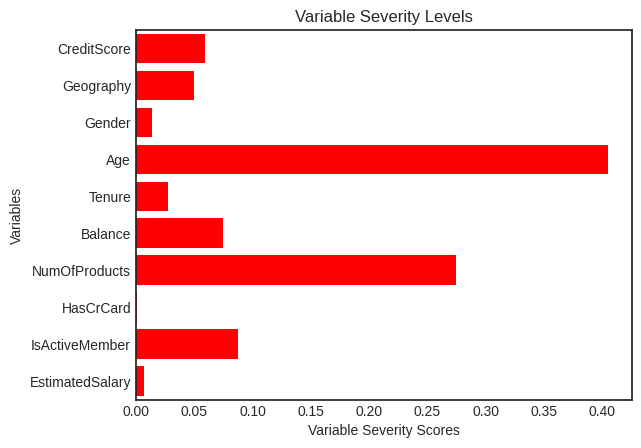

In [76]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

In [77]:
###KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)


In [78]:
KNN.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [79]:
y_pred=KNN.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:", accuracy_score(y_test, y_pred))

Accuracy of model: 0.8265


In [83]:
confusion_matrix(y_test, y_pred)


array([[1508,   80],
       [ 267,  145]])

In [84]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1588
           1       0.64      0.35      0.46       412

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

